In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('sample_data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# You can take transpose of the above table
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
df.isnull().head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df_copy = df.copy(deep = True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

print(df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


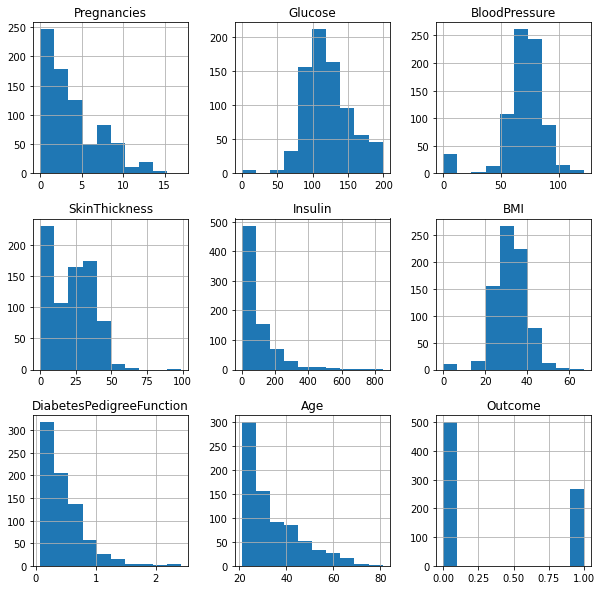

In [ ]:
p = df.hist(figsize = (10,10))

In [ ]:
# We can now fill the null values with the mean
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace = True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace = True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].mean(), inplace = True)
df_copy['Insulin'].fillna(df_copy['Insulin'].mean(), inplace = True)
df_copy['BMI'].fillna(df_copy['BMI'].mean(), inplace = True)


# Doubt here, can't it be filled with median?
# Does it make a huge difference?

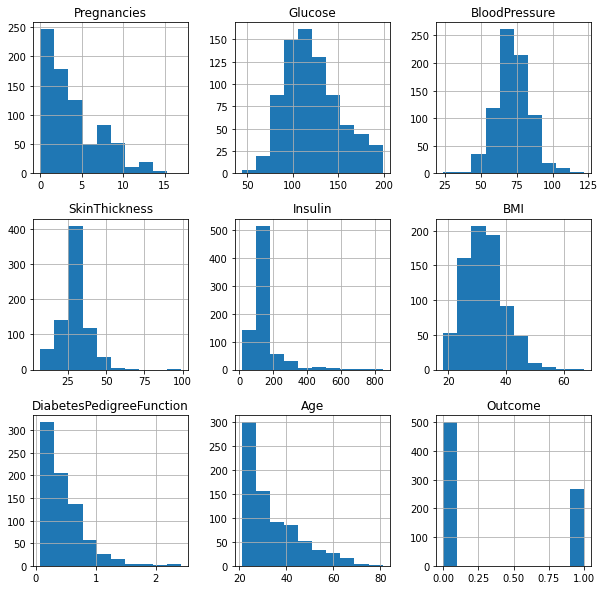

In [ ]:
p = df_copy.hist(figsize = (10,10))

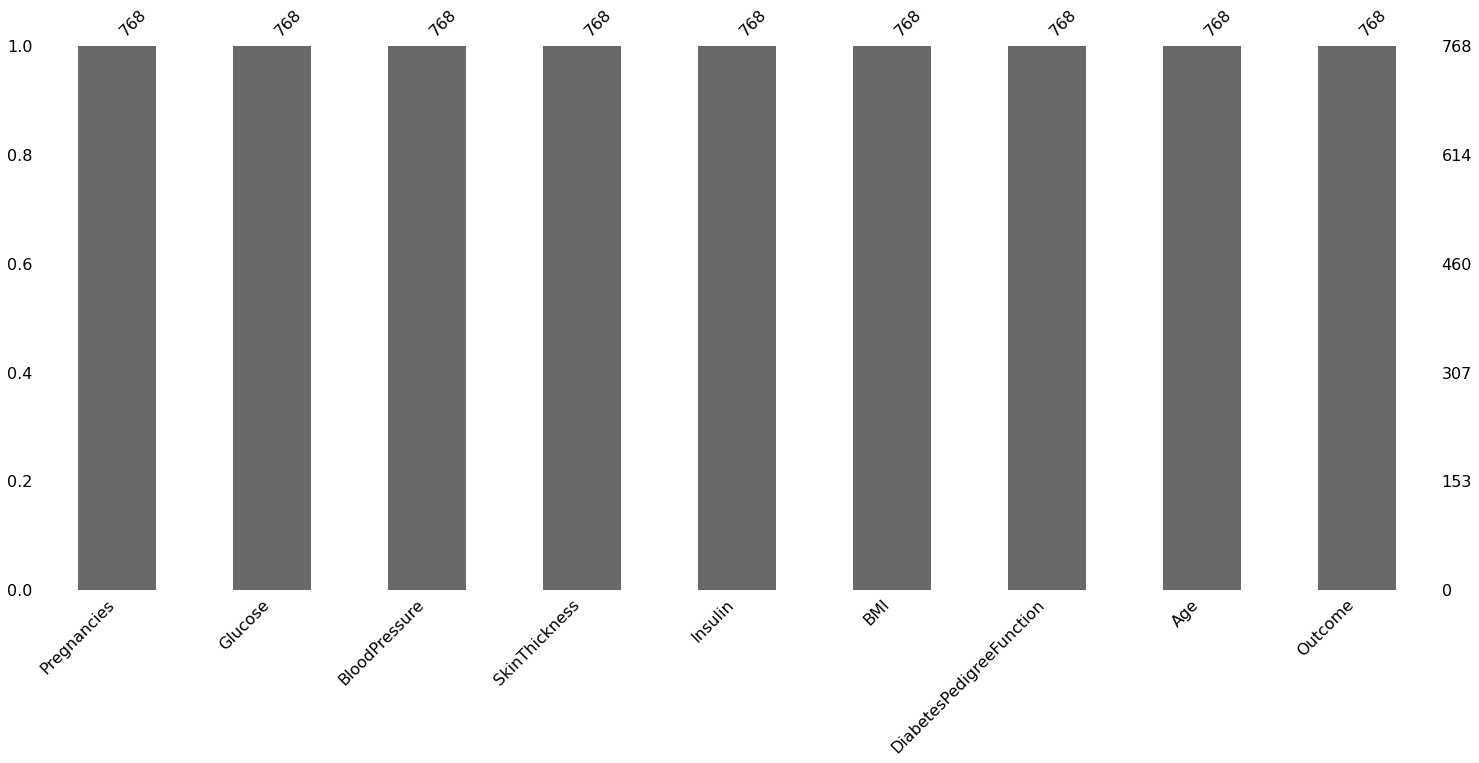

In [ ]:
# Null count analysis
p = msno.bar(df)

0    500
1    268
Name: Outcome, dtype: int64


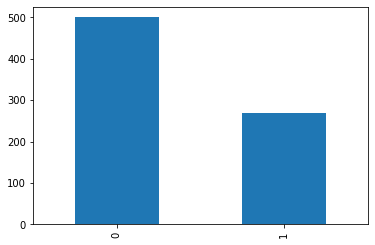

In [ ]:
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = df["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(df.Outcome.value_counts())
p=df.Outcome.value_counts().plot(kind="bar")

In [ ]:
#  our dataset is completely imbalanced. In fact the number of patients who are diabetic is half of the patients who are non-diabetic.
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter

labels_original = df['Outcome']
bank_data = df.drop(['Outcome'],axis = 1)
oversample = ADASYN()
X_smote, y_smote = oversample.fit_resample(bank_data, labels_original)
counter = Counter(y_smote)
print(counter)

Counter({0: 500, 1: 474})


In [ ]:
X_t_sm,X_test_sm,y_t_sm,y_test_sm = train_test_split(X_smote,y_smote,
                                               test_size = 0.1,
                                               stratify = y_smote,
                                               shuffle = True)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


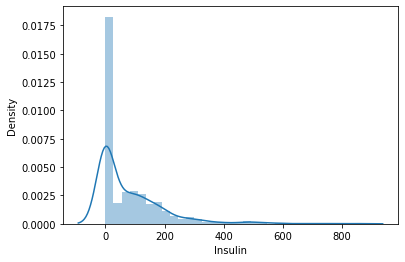

In [ ]:
sns.distplot(df['Insulin'])    
# For univariate distribution of a column

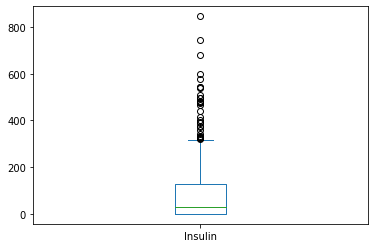

In [ ]:
# box plot for column insulin to check for outliers and noise
df['Insulin'].plot.box()

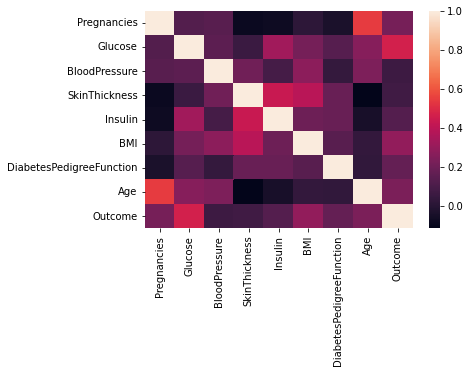

In [ ]:
p = sns.heatmap(df.corr())
# Now we can change the color of the heatmap


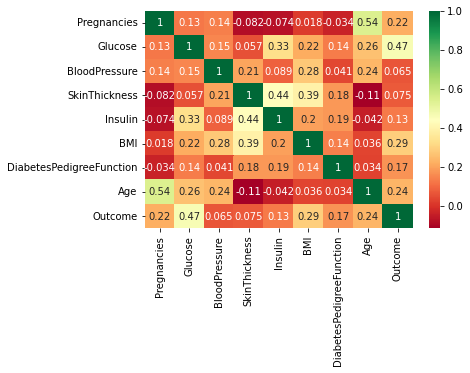

In [ ]:
p = sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')
# annote is to show values on the cell and cmap is the color of the map (red, yellow, green)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [ ]:
scaler = StandardScaler()
X = X_smote.drop(['BloodPressure', 'SkinThickness'], axis=1)
y = y_smote

In [ ]:
X = scaler.fit_transform(X)

In [ ]:
print(X)

[[ 0.62884856  0.83655731 -0.69673656  0.14034375  0.44318596  1.44702098]
 [-0.8962971  -1.20086399 -0.69673656 -0.78404344 -0.41354058 -0.23230739]
 [ 1.23890682  1.96845803 -0.69673656 -1.21982597  0.58286963 -0.14392169]
 ...
 [ 0.93387769  0.351457    0.33206544 -0.16338197  0.20909621  0.56316394]
 [ 0.62884856  2.03313807 -0.69673656  0.62404482 -0.57422481  1.8889495 ]
 [-1.20132623  0.02805679 -0.69673656  0.4863666  -0.69858848  1.53540669]]


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,f1_score, precision_score, recall_score,classification_report, accuracy_score

In [ ]:
class ConfMatrix:
  def __init__(self, y_test, y_preds):
    self.y_test = y_test
    self.y_preds = y_preds
    self.conf_mx = confusion_matrix(y_test,y_preds)
  def plot_matrix(self):
    heat_cm = pd.DataFrame(self.conf_mx, columns=np.unique(self.y_test), index = np.unique(self.y_test))
    heat_cm.index.name = 'Actual'
    heat_cm.columns.name = 'Predicted'

    sns.heatmap(heat_cm, cmap="Blues", annot=True, annot_kws={"size": 12},fmt='g')# font size
    plt.show()

# 1. Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
  
# making predictions on the testing set
y_preds = gnb.predict(X_test)

In [ ]:
print("Gaussian Naive Bayes model accuracy(in %):", accuracy_score(y_test, y_preds)*100)
print(classification_report(y_test, y_preds))

Gaussian Naive Bayes model accuracy(in %): 67.62295081967213
              precision    recall  f1-score   support

           0       0.70      0.72      0.71       134
           1       0.65      0.62      0.63       110

    accuracy                           0.68       244
   macro avg       0.67      0.67      0.67       244
weighted avg       0.68      0.68      0.68       244



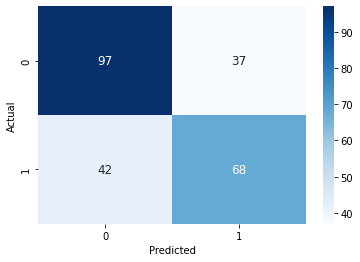

In [ ]:
gnb_cm = ConfMatrix(y_test, y_preds)
gnb_cm.plot_matrix()

In [ ]:
y_preds

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1])

Gaussian Naive Bayes model accuracy(in %): 76.5625

# 2. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

In [ ]:
clf.fit(X_train, y_train)
  
# making predictions on the testing set
y_preds = clf.predict(X_test)

In [ ]:
print("Decision Tree model accuracy(in %):", accuracy_score(y_test, y_preds)*100)
print(classification_report(y_test, y_preds))

Decision Tree model accuracy(in %): 70.49180327868852
              precision    recall  f1-score   support

           0       0.76      0.67      0.71       134
           1       0.65      0.75      0.69       110

    accuracy                           0.70       244
   macro avg       0.71      0.71      0.70       244
weighted avg       0.71      0.70      0.71       244



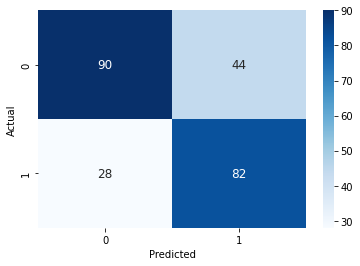

In [ ]:
dt_cm = ConfMatrix(y_test, y_preds)
dt_cm.plot_matrix()

In [ ]:
print(y_preds)

[1 0 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1
 0 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0
 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 0 1 1 1
 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 1 1 0 1 1 1 0
 1 1 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 1 1 0 0 0 0 1 0 1 0 0
 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1
 0 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 1 1 0 1 1 1]


# 3. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=16, random_state=0)

In [ ]:
rf.fit(X_train, y_train)
  
# making predictions on the testing set
y_preds = rf.predict(X_test)

print("Random Forest model accuracy(in %):", accuracy_score(y_test, y_preds)*100)
print(classification_report(y_test, y_preds))

Random Forest model accuracy(in %): 77.04918032786885
              precision    recall  f1-score   support

           0       0.86      0.69      0.77       134
           1       0.70      0.86      0.77       110

    accuracy                           0.77       244
   macro avg       0.78      0.78      0.77       244
weighted avg       0.79      0.77      0.77       244



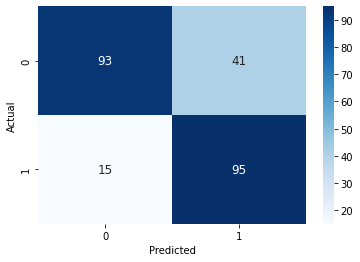

In [ ]:
rf_cm = ConfMatrix(y_test, y_preds)
rf_cm.plot_matrix()

In [ ]:
print(y_preds)

[1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 1 1
 0 1 1 0 0 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0
 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 1
 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 1
 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0
 0 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1]


# 4. SVM

In [ ]:
from sklearn import svm
svm = svm.SVC()

In [ ]:
svm.fit(X_train, y_train)
  
# making predictions on the testing set
y_preds = svm.predict(X_test)
print("SVM accuracy(in %):", accuracy_score(y_test, y_preds)*100)
print(classification_report(y_test, y_preds))

SVM accuracy(in %): 77.04918032786885
              precision    recall  f1-score   support

           0       0.85      0.71      0.77       134
           1       0.70      0.85      0.77       110

    accuracy                           0.77       244
   macro avg       0.78      0.78      0.77       244
weighted avg       0.78      0.77      0.77       244



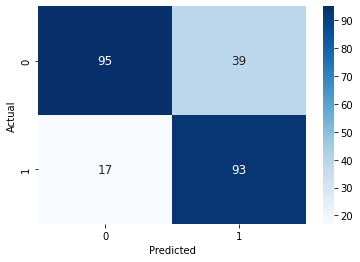

In [ ]:
svm_cm = ConfMatrix(y_test, y_preds)
svm_cm.plot_matrix()

# 5. Catboost Classifier

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(loss_function = 'Logloss',
                        eval_metric = 'BalancedAccuracy',
                        verbose = 200,
                        random_seed = 20)

cat_mod = cat.fit(X_train,y_train,
                   use_best_model=True,
                   verbose = 0,
                    plot=False)
                  
cat_y_preds = cat_mod.predict(X_test)

print("catboost classifier accuracy(in %):", accuracy_score(y_test, cat_y_preds)*100)
print(classification_report(y_test, cat_y_preds))


You should provide test set for use best model. use_best_model parameter has been switched to false value.


catboost classifier accuracy(in %): 78.68852459016394
              precision    recall  f1-score   support

           0       0.87      0.72      0.79       134
           1       0.72      0.86      0.79       110

    accuracy                           0.79       244
   macro avg       0.79      0.79      0.79       244
weighted avg       0.80      0.79      0.79       244



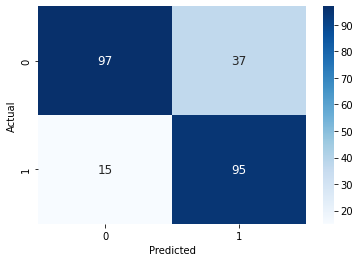

In [ ]:
cat_cm = ConfMatrix(y_test, cat_y_preds)
cat_cm.plot_matrix()

# 6. XGBoost Classifier

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import xgboost as xgb

In [ ]:
xgb_cl = xgb.XGBClassifier()

# Fit
xgb_cl.fit(X_train, y_train)

# Predict
y_preds = xgb_cl.predict(X_test)

print("XGB classifier accuracy(in %):", accuracy_score(y_test, y_preds)*100)
print(classification_report(y_test, y_preds))

XGB classifier accuracy(in %): 76.63934426229508
              precision    recall  f1-score   support

           0       0.84      0.71      0.77       134
           1       0.70      0.84      0.76       110

    accuracy                           0.77       244
   macro avg       0.77      0.77      0.77       244
weighted avg       0.78      0.77      0.77       244



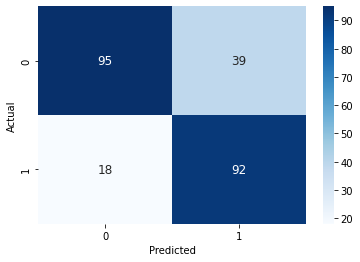

In [ ]:
xgb_cm = ConfMatrix(y_test, y_preds)
xgb_cm.plot_matrix()

# 7. KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10)

In [ ]:
neigh.fit(X_train, y_train)
knn_y_preds = neigh.predict(X_test)

print("KNN accuracy(in %):", accuracy_score(y_test, knn_y_preds)*100)
print(classification_report(y_test, knn_y_preds))

KNN accuracy(in %): 78.27868852459017
              precision    recall  f1-score   support

           0       0.83      0.76      0.79       134
           1       0.74      0.81      0.77       110

    accuracy                           0.78       244
   macro avg       0.78      0.79      0.78       244
weighted avg       0.79      0.78      0.78       244



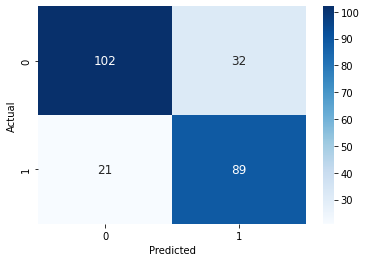

In [ ]:
knn_cm = ConfMatrix(y_test, knn_y_preds)
knn_cm.plot_matrix()

# 8. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_preds = lr.predict(X_test)

print("Logistic Regression accuracy(in %):", accuracy_score(y_test, y_preds)*100)
print(classification_report(y_test, y_preds))

Logistic Regression accuracy(in %): 71.31147540983606
              precision    recall  f1-score   support

           0       0.76      0.69      0.73       134
           1       0.66      0.74      0.70       110

    accuracy                           0.71       244
   macro avg       0.71      0.72      0.71       244
weighted avg       0.72      0.71      0.71       244



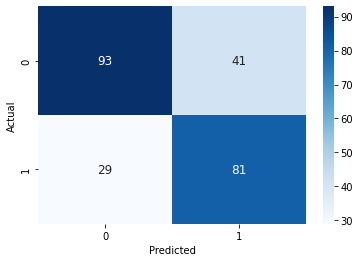

In [ ]:
lr_cm = ConfMatrix(y_test, y_preds)
lr_cm.plot_matrix()

# KNN + Catboost

In [ ]:
final_preds = np.logical_and(knn_y_preds, cat_y_preds)
# print(final_preds)
print("Accuracy(in %):", accuracy_score(y_test, final_preds)*100)
print(classification_report(y_test, final_preds))

Accuracy(in %): 80.73770491803278
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       134
           1       0.79      0.78      0.79       110

    accuracy                           0.81       244
   macro avg       0.81      0.81      0.81       244
weighted avg       0.81      0.81      0.81       244



# Hyperparameter optimisation

In [ ]:
def print_result(y_true, y_predict,model, arr):
    accuracy = metrics.accuracy_score(y_test, y_predict)
    # print("Accuracy: %.3f" % accuracy)

    precision = metrics.precision_score(y_test, y_predict)
    # print("Precision: %.3f" % precision)

    recall = metrics.recall_score(y_test, y_predict)
    # print("Recall: %.3f" % recall)

    f1 = metrics.f1_score(y_test, y_predict)
    # print("F1 Score: %.3f" % f1)
    arr[model] = {'accuracy': accuracy*100, 'precision': precision, 'recall': recall, 'f1_score': f1}
    return arr
    # return arr.append({model:{'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1_score': f1}})

In [ ]:
scores = {}

#1. KNN


In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [ ]:
knn.fit(X_train, y_train)
knn_y_preds = neigh.predict(X_test)

print("KNN accuracy(in %):", accuracy_score(y_test, knn_y_preds)*100)
print(classification_report(y_test, knn_y_preds))

KNN accuracy(in %): 78.27868852459017
              precision    recall  f1-score   support

           0       0.83      0.76      0.79       134
           1       0.74      0.81      0.77       110

    accuracy                           0.78       244
   macro avg       0.78      0.79      0.78       244
weighted avg       0.79      0.78      0.78       244



In [ ]:
estimator_KNN = KNeighborsClassifier()
parameters_KNN = {
    'n_neighbors': (5, 10),
    'leaf_size': (10,20,30,40,50),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev'),
}               
# with GridSearch
grid_search_KNN = GridSearchCV(
    estimator=estimator_KNN,
    param_grid=parameters_KNN,
    scoring = 'accuracy',
    # n_jobs = -1,
    cv = cv_method
)

In [ ]:
KNN_1=grid_search_KNN.fit(X_train, y_train)
y_pred_KNN1 =KNN_1.predict(X_test)

#Parameter setting that gave the best results on the hold out data.
print(grid_search_KNN.best_params_ ) 
#Mean cross-validated score of the best_estimator
print('Best Score - KNN:', grid_search_KNN.best_score_ )

{'leaf_size': 10, 'metric': 'minkowski', 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
Best Score - KNN: 0.7698630136986303


In [ ]:
best_knn = KNeighborsClassifier(leaf_size=10, metric='minkowski', n_neighbors=10, p=2, weights='uniform')
best_knn.fit(X_train, y_train)
knn_y_preds = best_knn.predict(X_test)

# print("KNN accuracy(in %):", accuracy_score(y_test, knn_y_preds)*100)
# print(classification_report(y_test, knn_y_preds))
print_result(y_test, knn_y_preds,'knn', scores)

{'knn': {'accuracy': 78.27868852459017,
  'precision': 0.7355371900826446,
  'recall': 0.8090909090909091,
  'f1_score': 0.7705627705627704}}

#2. Naive Bayes


In [ ]:
model = GaussianNB()
np.logspace(0,-9, num=10)

array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07,
       1.e-08, 1.e-09])

In [ ]:
from sklearn.preprocessing import PowerTransformer
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

best_nb = GridSearchCV(estimator=model, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(X_test)

best_nb.fit(Data_transformed, y_test);

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


In [ ]:
best_nb.best_params_

{'var_smoothing': 0.1}

In [ ]:
# predict the target on the test dataset
nb_y_predict= best_nb.predict(Data_transformed)

print_result(y_test, nb_y_predict, 'Naive Bayes', scores)

{'knn': {'accuracy': 78.27868852459017,
  'precision': 0.7355371900826446,
  'recall': 0.8090909090909091,
  'f1_score': 0.7705627705627704},
 'Naive Bayes': {'accuracy': 70.49180327868852,
  'precision': 0.6727272727272727,
  'recall': 0.6727272727272727,
  'f1_score': 0.6727272727272727}}

# 3. Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()
parameters = {
            'penalty': ['l2'], 
             'C': [0.001,0.011,0.1,1,10,100,1000],
            #  'max_iter' : [10,25]
              } 

best_lr = GridSearchCV(model, parameters,cv=cv_method,)

In [ ]:
best_lr.fit(X_train, y_train)
lr_y_predict = best_lr.predict(X_test)

print_result(y_test, lr_y_predict, 'Logistic Regression', scores)

{'knn': {'accuracy': 78.27868852459017,
  'precision': 0.7355371900826446,
  'recall': 0.8090909090909091,
  'f1_score': 0.7705627705627704},
 'Naive Bayes': {'accuracy': 70.49180327868852,
  'precision': 0.6727272727272727,
  'recall': 0.6727272727272727,
  'f1_score': 0.6727272727272727},
 'Logistic Regression': {'accuracy': 68.44262295081968,
  'precision': 0.6434782608695652,
  'recall': 0.6727272727272727,
  'f1_score': 0.6577777777777778}}

# 4. XGB Classifier

In [ ]:
xgb_cl = xgb.XGBClassifier()
parameters = {
            'eta':[0.1,0.3],
            'max_depth': [2,4,6],
            'min_child_weight': [0,1],
            'max_leaves':[0,1]
              } 

best_model = GridSearchCV(xgb_cl, parameters, cv=cv_method)

best_xgb = best_model.fit(X_train, y_train)
xgb_y_predict = best_xgb.predict(X_test)

print_result(y_test, xgb_y_predict, 'XGB', scores)

{'knn': {'accuracy': 78.27868852459017,
  'precision': 0.7355371900826446,
  'recall': 0.8090909090909091,
  'f1_score': 0.7705627705627704},
 'Naive Bayes': {'accuracy': 70.49180327868852,
  'precision': 0.6727272727272727,
  'recall': 0.6727272727272727,
  'f1_score': 0.6727272727272727},
 'Logistic Regression': {'accuracy': 68.44262295081968,
  'precision': 0.6434782608695652,
  'recall': 0.6727272727272727,
  'f1_score': 0.6577777777777778},
 'XGB': {'accuracy': 77.04918032786885,
  'precision': 0.7109375,
  'recall': 0.8272727272727273,
  'f1_score': 0.7647058823529412}}

In [ ]:
best_lr.best_params_

{'C': 0.001, 'penalty': 'l2'}


#5. Decision tree




In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()

parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best','random'],
    'max_depth': [2, 4],
    'min_samples_split': [0.1,0.3,0.5,0.9],
    'min_samples_leaf': [1,2,4]
}

best_model = GridSearchCV(dt_clf, parameters, cv=cv_method)

best_dt = best_model.fit(X_train, y_train)
dt_y_predict = best_dt.predict(X_test)
print(best_dt.best_params_)
print_result(y_test, dt_y_predict, 'Decision Tree', scores)

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 0.1, 'splitter': 'random'}


{'knn': {'accuracy': 78.27868852459017,
  'precision': 0.7355371900826446,
  'recall': 0.8090909090909091,
  'f1_score': 0.7705627705627704},
 'Naive Bayes': {'accuracy': 70.49180327868852,
  'precision': 0.6727272727272727,
  'recall': 0.6727272727272727,
  'f1_score': 0.6727272727272727},
 'Logistic Regression': {'accuracy': 68.44262295081968,
  'precision': 0.6434782608695652,
  'recall': 0.6727272727272727,
  'f1_score': 0.6577777777777778},
 'XGB': {'accuracy': 77.04918032786885,
  'precision': 0.7109375,
  'recall': 0.8272727272727273,
  'f1_score': 0.7647058823529412},
 'Decision Tree': {'accuracy': 65.57377049180327,
  'precision': 0.6181818181818182,
  'recall': 0.6181818181818182,
  'f1_score': 0.6181818181818182}}

#6. Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(n_estimators=10).fit(X_train,y_train)
y_pred=rf_clf.predict(X_test)
model=RandomForestClassifier(n_estimators=100,criterion='gini',
                             max_features='sqrt',min_samples_leaf=5,random_state=0).fit(X_train,y_train)
predictions=model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(metrics.accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

[[95 39]
 [19 91]]
0.7622950819672131
              precision    recall  f1-score   support

           0       0.83      0.71      0.77       134
           1       0.70      0.83      0.76       110

    accuracy                           0.76       244
   macro avg       0.77      0.77      0.76       244
weighted avg       0.77      0.76      0.76       244



In [ ]:
#Randomized search cv
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(450, 511,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [450, 456, 463, 470, 477, 483, 490, 497, 504, 511], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [ ]:
rf=RandomForestClassifier()
best_rf = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=20, cv=5,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
best_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [450, 456, 463, 470, 477,
                                                      483, 490, 497, 504, 511],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=100, verbose=2)

In [ ]:
best_rf.best_params_

{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 477,
 'criterion': 'gini'}

In [ ]:
rf_y_pred=best_rf.predict(X_test)

print_result(y_test,rf_y_pred,'Random_Forest', scores)

{'knn': {'accuracy': 78.27868852459017,
  'precision': 0.7355371900826446,
  'recall': 0.8090909090909091,
  'f1_score': 0.7705627705627704},
 'Naive Bayes': {'accuracy': 70.49180327868852,
  'precision': 0.6727272727272727,
  'recall': 0.6727272727272727,
  'f1_score': 0.6727272727272727},
 'Logistic Regression': {'accuracy': 68.44262295081968,
  'precision': 0.6434782608695652,
  'recall': 0.6727272727272727,
  'f1_score': 0.6577777777777778},
 'XGB': {'accuracy': 77.04918032786885,
  'precision': 0.7109375,
  'recall': 0.8272727272727273,
  'f1_score': 0.7647058823529412},
 'Decision Tree': {'accuracy': 65.57377049180327,
  'precision': 0.6181818181818182,
  'recall': 0.6181818181818182,
  'f1_score': 0.6181818181818182},
 'Random_Forest': {'accuracy': 78.68852459016394,
  'precision': 0.7164179104477612,
  'recall': 0.8727272727272727,
  'f1_score': 0.7868852459016392}}

#7. SVM

In [ ]:
from sklearn.svm import SVC
model_params = {
        'C':[1,10,20,50],
        'kernel':['linear', 'rbf']
        }

In [ ]:
svm = SVC()
best_model = GridSearchCV(svm, model_params,cv=cv_method)

best_svm = best_model.fit(X_train, y_train)
svm_y_predict = best_svm.predict(X_test)

print_result(y_test, svm_y_predict, 'SVM', scores)

{'knn': {'accuracy': 78.27868852459017,
  'precision': 0.7355371900826446,
  'recall': 0.8090909090909091,
  'f1_score': 0.7705627705627704},
 'Naive Bayes': {'accuracy': 70.49180327868852,
  'precision': 0.6727272727272727,
  'recall': 0.6727272727272727,
  'f1_score': 0.6727272727272727},
 'Logistic Regression': {'accuracy': 68.44262295081968,
  'precision': 0.6434782608695652,
  'recall': 0.6727272727272727,
  'f1_score': 0.6577777777777778},
 'XGB': {'accuracy': 77.04918032786885,
  'precision': 0.7109375,
  'recall': 0.8272727272727273,
  'f1_score': 0.7647058823529412},
 'Decision Tree': {'accuracy': 65.57377049180327,
  'precision': 0.6181818181818182,
  'recall': 0.6181818181818182,
  'f1_score': 0.6181818181818182},
 'Random_Forest': {'accuracy': 78.68852459016394,
  'precision': 0.7164179104477612,
  'recall': 0.8727272727272727,
  'f1_score': 0.7868852459016392},
 'SVM': {'accuracy': 77.04918032786885,
  'precision': 0.7045454545454546,
  'recall': 0.8454545454545455,
  'f1_

#8. Catboost

In [ ]:
cat = CatBoostClassifier()

cat_mod = cat.fit(X_train,y_train,
                   use_best_model=True,
                   verbose = 0,
                    plot=False)
                  
cat_y_preds = cat_mod.predict(X_test)

print_result(y_test, cat_y_preds, 'Catboost', scores)

You should provide test set for use best model. use_best_model parameter has been switched to false value.


{'knn': {'accuracy': 78.27868852459017,
  'precision': 0.7355371900826446,
  'recall': 0.8090909090909091,
  'f1_score': 0.7705627705627704},
 'Naive Bayes': {'accuracy': 70.49180327868852,
  'precision': 0.6727272727272727,
  'recall': 0.6727272727272727,
  'f1_score': 0.6727272727272727},
 'Logistic Regression': {'accuracy': 68.44262295081968,
  'precision': 0.6434782608695652,
  'recall': 0.6727272727272727,
  'f1_score': 0.6577777777777778},
 'XGB': {'accuracy': 77.04918032786885,
  'precision': 0.7109375,
  'recall': 0.8272727272727273,
  'f1_score': 0.7647058823529412},
 'Decision Tree': {'accuracy': 65.57377049180327,
  'precision': 0.6181818181818182,
  'recall': 0.6181818181818182,
  'f1_score': 0.6181818181818182},
 'Random_Forest': {'accuracy': 78.68852459016394,
  'precision': 0.7164179104477612,
  'recall': 0.8727272727272727,
  'f1_score': 0.7868852459016392},
 'SVM': {'accuracy': 77.04918032786885,
  'precision': 0.7045454545454546,
  'recall': 0.8454545454545455,
  'f1_

In [ ]:
df = pd.DataFrame.from_records(scores)
df

,Catboost,Decision Tree,Logistic Regression,Naive Bayes,Random_Forest,SVM,XGB,knn
accuracy,77.049180,65.573770,68.442623,70.491803,78.688525,77.049180,77.049180,78.278689
precision,0.701493,0.618182,0.643478,0.672727,0.716418,0.704545,0.710938,0.735537
recall,0.854545,0.618182,0.672727,0.672727,0.872727,0.845455,0.827273,0.809091
f1_score,0.770492,0.618182,0.657778,0.672727,0.786885,0.768595,0.764706,0.770563


In [ ]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(estimators=[('knn', best_knn), ('NB', best_nb), ('RF', best_rf)], voting='hard')
vc.fit(X_train,y_train)
vc.score(X_test,y_test)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.7827868852459017

In [ ]:
df.to_excel('output.xlsx')

In [ ]:
df

,Catboost,Decision Tree,Logistic Regression,Naive Bayes,Random_Forest,SVM,XGB,knn
accuracy,77.049180,65.573770,68.442623,70.491803,78.688525,77.049180,77.049180,78.278689
precision,0.701493,0.618182,0.643478,0.672727,0.716418,0.704545,0.710938,0.735537
recall,0.854545,0.618182,0.672727,0.672727,0.872727,0.845455,0.827273,0.809091
f1_score,0.770492,0.618182,0.657778,0.672727,0.786885,0.768595,0.764706,0.770563


In [ ]:
X_train.shape

(730, 6)

In [ ]:
import torch
import torch.nn as nn
from tqdm import tqdm

In [ ]:
class LogisticRegression(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear_1 = torch.nn.Linear(input_dim, 1024)
        self.dropout_1 = torch.nn.Dropout()
        self.linear_2 = torch.nn.Linear(1024, 512)
        self.dropout_2 = torch.nn.Dropout()
        self.linear_3 = torch.nn.Linear(512, 128)
        self.linear_4 = torch.nn.Linear(128, output_dim)
        
    def forward(self, x):
        x = self.linear_1(x)
        x = self.dropout_1(x)
        x = self.linear_2(x)
        x = self.dropout_2(x)
        x = self.linear_3(x)
        outputs = torch.sigmoid(self.linear_4(x))
        return outputs

In [ ]:
epochs = 200_000
input_dim = 6 # Two inputs x1 and x2 
output_dim = 1 # Two possible outputs
learning_rate = 0.001

model = LogisticRegression(input_dim,output_dim)

In [ ]:
criterion = torch.nn.BCELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

X_train, X_test = torch.Tensor(X_train),torch.Tensor(X_test)
y_train, y_test = torch.Tensor(np.array(y_train)),torch.Tensor(np.array(y_test))

In [ ]:
losses = []
losses_test = []
Iterations = []
iter = 0
for epoch in tqdm(range(int(epochs)),desc='Training Epochs'):
    x = X_train
    labels = y_train
    optimizer.zero_grad() # Setting our stored gradients equal to zero
    outputs = model(X_train)
    loss = criterion(torch.squeeze(outputs), labels) # [200,1] -squeeze-> [200]
    
    loss.backward() # Computes the gradient of the given tensor w.r.t. graph leaves 
    
    optimizer.step() # Updates weights and biases with the optimizer (SGD)
    iter+=1
    if iter%1000==0:
        # calculate Accuracy
        with torch.no_grad():
            # Calculating the loss and accuracy for the test dataset
            correct_test = 0
            total_test = 0
            outputs_test = torch.squeeze(model(X_test))
            loss_test = criterion(outputs_test, y_test)
            
            predicted_test = outputs_test.round().detach().numpy()
            total_test += y_test.size(0)
            correct_test += np.sum(predicted_test == y_test.detach().numpy())
            accuracy_test = 100 * correct_test/total_test
            losses_test.append(loss_test.item())
            
            # Calculating the loss and accuracy for the train dataset
            total = 0
            correct = 0
            total += y_train.size(0)
            correct += np.sum(torch.squeeze(outputs).round().detach().numpy() == y_train.detach().numpy())
            accuracy = 100 * correct/total
            losses.append(loss.item())
            Iterations.append(iter)
            
            print(f"Iteration: {iter}. \nTest - Loss: {loss_test.item()}. Accuracy: {accuracy_test}")
            print(f"Train -  Loss: {loss.item()}. Accuracy: {accuracy}\n")

Training Epochs:   1%|          | 1003/200000 [01:00<3:28:45, 15.89it/s]

Iteration: 1000. 
Test - Loss: 0.5556681752204895. Accuracy: 72.54098360655738
Train -  Loss: 0.5430312752723694. Accuracy: 70.68493150684931



Training Epochs:   1%|          | 2003/200000 [02:00<3:20:22, 16.47it/s]

Iteration: 2000. 
Test - Loss: 0.5519342422485352. Accuracy: 71.72131147540983
Train -  Loss: 0.5475438833236694. Accuracy: 70.54794520547945



Training Epochs:   2%|▏         | 3003/200000 [03:01<3:16:12, 16.73it/s]

Iteration: 3000. 
Test - Loss: 0.5546623468399048. Accuracy: 69.26229508196721
Train -  Loss: 0.5436171293258667. Accuracy: 70.95890410958904



Training Epochs:   2%|▏         | 4003/200000 [04:03<3:18:35, 16.45it/s]

Iteration: 4000. 
Test - Loss: 0.5544583797454834. Accuracy: 70.08196721311475
Train -  Loss: 0.5428423285484314. Accuracy: 70.82191780821918



Training Epochs:   3%|▎         | 5003/200000 [05:03<3:22:45, 16.03it/s]

Iteration: 5000. 
Test - Loss: 0.559809684753418. Accuracy: 71.31147540983606
Train -  Loss: 0.5399229526519775. Accuracy: 70.95890410958904



Training Epochs:   3%|▎         | 6003/200000 [06:04<3:21:34, 16.04it/s]

Iteration: 6000. 
Test - Loss: 0.5648998618125916. Accuracy: 69.67213114754098
Train -  Loss: 0.549424409866333. Accuracy: 70.54794520547945



Training Epochs:   4%|▎         | 7003/200000 [07:04<3:10:55, 16.85it/s]

Iteration: 7000. 
Test - Loss: 0.554309070110321. Accuracy: 70.08196721311475
Train -  Loss: 0.5484065413475037. Accuracy: 70.95890410958904



Training Epochs:   4%|▍         | 8003/200000 [08:06<3:29:33, 15.27it/s]

Iteration: 8000. 
Test - Loss: 0.5600532293319702. Accuracy: 70.08196721311475
Train -  Loss: 0.5404618978500366. Accuracy: 71.0958904109589



Training Epochs:   5%|▍         | 9003/200000 [09:06<3:16:48, 16.17it/s]

Iteration: 9000. 
Test - Loss: 0.5593845248222351. Accuracy: 70.49180327868852
Train -  Loss: 0.5417978167533875. Accuracy: 70.68493150684931



Training Epochs:   5%|▌         | 10003/200000 [10:06<3:21:12, 15.74it/s]

Iteration: 10000. 
Test - Loss: 0.5610198974609375. Accuracy: 70.08196721311475
Train -  Loss: 0.5451032519340515. Accuracy: 70.54794520547945



Training Epochs:   6%|▌         | 11003/200000 [11:07<3:18:04, 15.90it/s]

Iteration: 11000. 
Test - Loss: 0.5568410158157349. Accuracy: 70.49180327868852
Train -  Loss: 0.5420814156532288. Accuracy: 70.13698630136986



Training Epochs:   6%|▌         | 12003/200000 [12:07<3:22:59, 15.44it/s]

Iteration: 12000. 
Test - Loss: 0.5590640306472778. Accuracy: 70.49180327868852
Train -  Loss: 0.5469179153442383. Accuracy: 69.86301369863014



Training Epochs:   7%|▋         | 13003/200000 [13:11<3:10:47, 16.34it/s]

Iteration: 13000. 
Test - Loss: 0.5591588616371155. Accuracy: 70.90163934426229
Train -  Loss: 0.544370710849762. Accuracy: 71.0958904109589



Training Epochs:   7%|▋         | 14003/200000 [14:12<3:08:05, 16.48it/s]

Iteration: 14000. 
Test - Loss: 0.5608667135238647. Accuracy: 70.49180327868852
Train -  Loss: 0.5440962314605713. Accuracy: 70.68493150684931



Training Epochs:   8%|▊         | 15003/200000 [15:13<3:22:09, 15.25it/s]

Iteration: 15000. 
Test - Loss: 0.5517747402191162. Accuracy: 70.90163934426229
Train -  Loss: 0.5428816080093384. Accuracy: 70.54794520547945



Training Epochs:   8%|▊         | 16003/200000 [16:14<3:01:35, 16.89it/s]

Iteration: 16000. 
Test - Loss: 0.5617896914482117. Accuracy: 70.90163934426229
Train -  Loss: 0.5433368682861328. Accuracy: 70.95890410958904



Training Epochs:   9%|▊         | 17003/200000 [17:14<2:58:36, 17.08it/s]

Iteration: 17000. 
Test - Loss: 0.555509626865387. Accuracy: 71.31147540983606
Train -  Loss: 0.5408661365509033. Accuracy: 70.54794520547945



Training Epochs:   9%|▉         | 18003/200000 [18:13<3:02:09, 16.65it/s]

Iteration: 18000. 
Test - Loss: 0.5633054375648499. Accuracy: 71.72131147540983
Train -  Loss: 0.5414760708808899. Accuracy: 70.0



Training Epochs:  10%|▉         | 19003/200000 [19:12<2:59:56, 16.76it/s]

Iteration: 19000. 
Test - Loss: 0.5590527057647705. Accuracy: 70.49180327868852
Train -  Loss: 0.5402026772499084. Accuracy: 70.54794520547945



Training Epochs:  10%|█         | 20003/200000 [20:10<2:58:43, 16.79it/s]

Iteration: 20000. 
Test - Loss: 0.5596094727516174. Accuracy: 71.72131147540983
Train -  Loss: 0.5456255674362183. Accuracy: 70.82191780821918



Training Epochs:  11%|█         | 21003/200000 [21:11<2:56:55, 16.86it/s]

Iteration: 21000. 
Test - Loss: 0.5643317699432373. Accuracy: 70.08196721311475
Train -  Loss: 0.5420182943344116. Accuracy: 70.41095890410959



Training Epochs:  11%|█         | 22003/200000 [22:10<2:58:40, 16.60it/s]

Iteration: 22000. 
Test - Loss: 0.5575498938560486. Accuracy: 71.31147540983606
Train -  Loss: 0.5435935258865356. Accuracy: 70.41095890410959



Training Epochs:  12%|█▏        | 23003/200000 [23:08<2:57:49, 16.59it/s]

Iteration: 23000. 
Test - Loss: 0.565962016582489. Accuracy: 70.08196721311475
Train -  Loss: 0.5365144610404968. Accuracy: 70.13698630136986



Training Epochs:  12%|█▏        | 24003/200000 [24:07<2:59:49, 16.31it/s]

Iteration: 24000. 
Test - Loss: 0.5619943141937256. Accuracy: 68.44262295081967
Train -  Loss: 0.5430026054382324. Accuracy: 70.54794520547945



Training Epochs:  13%|█▎        | 25003/200000 [25:07<2:56:56, 16.48it/s]

Iteration: 25000. 
Test - Loss: 0.5605536699295044. Accuracy: 70.90163934426229
Train -  Loss: 0.543967068195343. Accuracy: 70.41095890410959



Training Epochs:  13%|█▎        | 26003/200000 [26:06<2:56:50, 16.40it/s]

Iteration: 26000. 
Test - Loss: 0.5627872347831726. Accuracy: 71.31147540983606
Train -  Loss: 0.5411005616188049. Accuracy: 71.0958904109589



Training Epochs:  14%|█▎        | 27003/200000 [27:06<2:52:58, 16.67it/s]

Iteration: 27000. 
Test - Loss: 0.5580663084983826. Accuracy: 69.26229508196721
Train -  Loss: 0.5414788126945496. Accuracy: 71.23287671232876



Training Epochs:  14%|█▍        | 28003/200000 [28:05<2:51:51, 16.68it/s]

Iteration: 28000. 
Test - Loss: 0.555404543876648. Accuracy: 72.54098360655738
Train -  Loss: 0.5448417663574219. Accuracy: 70.95890410958904



Training Epochs:  15%|█▍        | 29003/200000 [29:06<2:49:49, 16.78it/s]

Iteration: 29000. 
Test - Loss: 0.5539155006408691. Accuracy: 70.49180327868852
Train -  Loss: 0.5424119830131531. Accuracy: 69.86301369863014



Training Epochs:  15%|█▌        | 30003/200000 [30:06<2:50:06, 16.66it/s]

Iteration: 30000. 
Test - Loss: 0.5615509152412415. Accuracy: 70.90163934426229
Train -  Loss: 0.5435001850128174. Accuracy: 71.5068493150685



Training Epochs:  16%|█▌        | 31003/200000 [31:06<2:46:14, 16.94it/s]

Iteration: 31000. 
Test - Loss: 0.5685575604438782. Accuracy: 70.08196721311475
Train -  Loss: 0.5428516864776611. Accuracy: 71.23287671232876



Training Epochs:  16%|█▌        | 32003/200000 [32:05<2:47:12, 16.74it/s]

Iteration: 32000. 
Test - Loss: 0.5546691417694092. Accuracy: 70.90163934426229
Train -  Loss: 0.5393734574317932. Accuracy: 69.86301369863014



Training Epochs:  17%|█▋        | 33003/200000 [33:04<2:44:49, 16.89it/s]

Iteration: 33000. 
Test - Loss: 0.5552595853805542. Accuracy: 70.90163934426229
Train -  Loss: 0.5444947481155396. Accuracy: 70.0



Training Epochs:  17%|█▋        | 34003/200000 [34:05<2:46:05, 16.66it/s]

Iteration: 34000. 
Test - Loss: 0.5579695701599121. Accuracy: 69.67213114754098
Train -  Loss: 0.5425015687942505. Accuracy: 70.13698630136986



Training Epochs:  18%|█▊        | 35003/200000 [35:04<2:43:34, 16.81it/s]

Iteration: 35000. 
Test - Loss: 0.5671499371528625. Accuracy: 69.67213114754098
Train -  Loss: 0.5442682504653931. Accuracy: 70.41095890410959



Training Epochs:  18%|█▊        | 36003/200000 [36:02<2:41:59, 16.87it/s]

Iteration: 36000. 
Test - Loss: 0.5568550825119019. Accuracy: 71.72131147540983
Train -  Loss: 0.5471176505088806. Accuracy: 70.0



Training Epochs:  19%|█▊        | 37003/200000 [37:01<2:41:04, 16.87it/s]

Iteration: 37000. 
Test - Loss: 0.5605366230010986. Accuracy: 69.26229508196721
Train -  Loss: 0.5418673753738403. Accuracy: 70.95890410958904



Training Epochs:  19%|█▉        | 38003/200000 [38:03<2:44:51, 16.38it/s]

Iteration: 38000. 
Test - Loss: 0.5649511814117432. Accuracy: 71.31147540983606
Train -  Loss: 0.5425198078155518. Accuracy: 71.23287671232876



Training Epochs:  20%|█▉        | 39003/200000 [39:03<2:41:54, 16.57it/s]

Iteration: 39000. 
Test - Loss: 0.568970263004303. Accuracy: 70.08196721311475
Train -  Loss: 0.5380236506462097. Accuracy: 70.95890410958904



Training Epochs:  20%|██        | 40003/200000 [40:02<2:40:21, 16.63it/s]

Iteration: 40000. 
Test - Loss: 0.5640141367912292. Accuracy: 72.1311475409836
Train -  Loss: 0.5425410270690918. Accuracy: 71.5068493150685



Training Epochs:  21%|██        | 41003/200000 [41:01<2:38:24, 16.73it/s]

Iteration: 41000. 
Test - Loss: 0.5557035803794861. Accuracy: 69.67213114754098
Train -  Loss: 0.5412107706069946. Accuracy: 70.95890410958904



Training Epochs:  21%|██        | 42003/200000 [42:03<2:57:21, 14.85it/s]

Iteration: 42000. 
Test - Loss: 0.5529246926307678. Accuracy: 71.31147540983606
Train -  Loss: 0.5419154763221741. Accuracy: 71.23287671232876



Training Epochs:  22%|██▏       | 43003/200000 [43:02<2:34:52, 16.90it/s]

Iteration: 43000. 
Test - Loss: 0.5563285946846008. Accuracy: 69.67213114754098
Train -  Loss: 0.5450567603111267. Accuracy: 70.95890410958904



Training Epochs:  22%|██▏       | 44003/200000 [44:01<2:34:02, 16.88it/s]

Iteration: 44000. 
Test - Loss: 0.5559638142585754. Accuracy: 72.54098360655738
Train -  Loss: 0.5462315678596497. Accuracy: 70.41095890410959



Training Epochs:  23%|██▎       | 45003/200000 [45:00<2:34:47, 16.69it/s]

Iteration: 45000. 
Test - Loss: 0.5523703098297119. Accuracy: 70.90163934426229
Train -  Loss: 0.5436801314353943. Accuracy: 71.23287671232876



Training Epochs:  23%|██▎       | 46003/200000 [45:59<2:37:35, 16.29it/s]

Iteration: 46000. 
Test - Loss: 0.5557665228843689. Accuracy: 71.31147540983606
Train -  Loss: 0.5415050983428955. Accuracy: 70.82191780821918



Training Epochs:  24%|██▎       | 47003/200000 [47:01<2:33:25, 16.62it/s]

Iteration: 47000. 
Test - Loss: 0.5611022710800171. Accuracy: 70.49180327868852
Train -  Loss: 0.5438166260719299. Accuracy: 70.95890410958904



Training Epochs:  24%|██▍       | 48003/200000 [48:00<2:32:29, 16.61it/s]

Iteration: 48000. 
Test - Loss: 0.5680569410324097. Accuracy: 69.26229508196721
Train -  Loss: 0.5519099235534668. Accuracy: 70.68493150684931



Training Epochs:  25%|██▍       | 49003/200000 [49:00<2:29:17, 16.86it/s]

Iteration: 49000. 
Test - Loss: 0.5650885105133057. Accuracy: 70.90163934426229
Train -  Loss: 0.5396415591239929. Accuracy: 70.82191780821918



Training Epochs:  25%|██▌       | 50003/200000 [49:59<2:30:02, 16.66it/s]

Iteration: 50000. 
Test - Loss: 0.5632535815238953. Accuracy: 69.26229508196721
Train -  Loss: 0.5449962615966797. Accuracy: 70.68493150684931



Training Epochs:  26%|██▌       | 51003/200000 [51:00<2:26:18, 16.97it/s]

Iteration: 51000. 
Test - Loss: 0.557287871837616. Accuracy: 70.90163934426229
Train -  Loss: 0.5439252257347107. Accuracy: 70.82191780821918



Training Epochs:  26%|██▌       | 52003/200000 [51:59<2:26:35, 16.83it/s]

Iteration: 52000. 
Test - Loss: 0.5552079081535339. Accuracy: 71.72131147540983
Train -  Loss: 0.541994035243988. Accuracy: 70.68493150684931



Training Epochs:  27%|██▋       | 53003/200000 [52:58<2:25:21, 16.86it/s]

Iteration: 53000. 
Test - Loss: 0.5587051510810852. Accuracy: 69.67213114754098
Train -  Loss: 0.5389115214347839. Accuracy: 70.68493150684931



Training Epochs:  27%|██▋       | 54003/200000 [53:58<2:27:53, 16.45it/s]

Iteration: 54000. 
Test - Loss: 0.5534317493438721. Accuracy: 70.90163934426229
Train -  Loss: 0.539239227771759. Accuracy: 71.5068493150685



Training Epochs:  28%|██▊       | 55003/200000 [54:59<2:27:30, 16.38it/s]

Iteration: 55000. 
Test - Loss: 0.5661460161209106. Accuracy: 71.31147540983606
Train -  Loss: 0.5435011386871338. Accuracy: 69.86301369863014



Training Epochs:  28%|██▊       | 56003/200000 [55:58<2:22:55, 16.79it/s]

Iteration: 56000. 
Test - Loss: 0.5598992705345154. Accuracy: 69.67213114754098
Train -  Loss: 0.5441973805427551. Accuracy: 70.82191780821918



Training Epochs:  29%|██▊       | 57003/200000 [56:57<2:23:44, 16.58it/s]

Iteration: 57000. 
Test - Loss: 0.5562878847122192. Accuracy: 70.08196721311475
Train -  Loss: 0.5474697351455688. Accuracy: 71.0958904109589



Training Epochs:  29%|██▉       | 58003/200000 [57:57<2:24:09, 16.42it/s]

Iteration: 58000. 
Test - Loss: 0.556269645690918. Accuracy: 70.08196721311475
Train -  Loss: 0.5459270477294922. Accuracy: 70.68493150684931



Training Epochs:  30%|██▉       | 59003/200000 [58:57<2:20:34, 16.72it/s]

Iteration: 59000. 
Test - Loss: 0.5572113394737244. Accuracy: 72.54098360655738
Train -  Loss: 0.5430049300193787. Accuracy: 70.27397260273973



Training Epochs:  30%|███       | 60003/200000 [59:57<2:19:27, 16.73it/s]

Iteration: 60000. 
Test - Loss: 0.5556812882423401. Accuracy: 71.31147540983606
Train -  Loss: 0.5420246124267578. Accuracy: 70.95890410958904



Training Epochs:  31%|███       | 61003/200000 [1:00:56<2:19:35, 16.60it/s]

Iteration: 61000. 
Test - Loss: 0.5631615519523621. Accuracy: 69.67213114754098
Train -  Loss: 0.5445349216461182. Accuracy: 71.0958904109589



Training Epochs:  31%|███       | 62003/200000 [1:01:55<2:19:10, 16.53it/s]

Iteration: 62000. 
Test - Loss: 0.5505159497261047. Accuracy: 71.72131147540983
Train -  Loss: 0.5423445701599121. Accuracy: 70.41095890410959



Training Epochs:  32%|███▏      | 63003/200000 [1:02:54<2:16:40, 16.71it/s]

Iteration: 63000. 
Test - Loss: 0.5648698806762695. Accuracy: 69.26229508196721
Train -  Loss: 0.54289710521698. Accuracy: 70.95890410958904



Training Epochs:  32%|███▏      | 64003/200000 [1:03:55<2:14:43, 16.82it/s]

Iteration: 64000. 
Test - Loss: 0.555734395980835. Accuracy: 71.72131147540983
Train -  Loss: 0.5427768230438232. Accuracy: 70.95890410958904



Training Epochs:  33%|███▎      | 65003/200000 [1:04:54<2:16:34, 16.47it/s]

Iteration: 65000. 
Test - Loss: 0.5560396909713745. Accuracy: 71.72131147540983
Train -  Loss: 0.5396425724029541. Accuracy: 70.13698630136986



Training Epochs:  33%|███▎      | 66003/200000 [1:05:53<2:13:14, 16.76it/s]

Iteration: 66000. 
Test - Loss: 0.558601975440979. Accuracy: 71.31147540983606
Train -  Loss: 0.5442206263542175. Accuracy: 70.54794520547945



Training Epochs:  34%|███▎      | 67003/200000 [1:06:53<2:12:26, 16.74it/s]

Iteration: 67000. 
Test - Loss: 0.5527531504631042. Accuracy: 71.72131147540983
Train -  Loss: 0.5418574810028076. Accuracy: 69.86301369863014



Training Epochs:  34%|███▍      | 68003/200000 [1:07:54<2:15:35, 16.23it/s]

Iteration: 68000. 
Test - Loss: 0.5478144884109497. Accuracy: 70.08196721311475
Train -  Loss: 0.543113112449646. Accuracy: 70.68493150684931



Training Epochs:  35%|███▍      | 69003/200000 [1:08:53<2:14:20, 16.25it/s]

Iteration: 69000. 
Test - Loss: 0.5605006217956543. Accuracy: 70.49180327868852
Train -  Loss: 0.5362645387649536. Accuracy: 70.41095890410959



Training Epochs:  35%|███▌      | 70003/200000 [1:09:53<2:09:52, 16.68it/s]

Iteration: 70000. 
Test - Loss: 0.5629257559776306. Accuracy: 69.67213114754098
Train -  Loss: 0.5407963395118713. Accuracy: 70.95890410958904



Training Epochs:  36%|███▌      | 71003/200000 [1:10:53<2:10:14, 16.51it/s]

Iteration: 71000. 
Test - Loss: 0.5575605630874634. Accuracy: 72.1311475409836
Train -  Loss: 0.5472256541252136. Accuracy: 71.23287671232876



Training Epochs:  36%|███▌      | 72003/200000 [1:11:53<2:10:36, 16.33it/s]

Iteration: 72000. 
Test - Loss: 0.5649054050445557. Accuracy: 71.31147540983606
Train -  Loss: 0.5400657653808594. Accuracy: 70.95890410958904



Training Epochs:  37%|███▋      | 73003/200000 [1:12:54<2:09:48, 16.31it/s]

Iteration: 73000. 
Test - Loss: 0.553970456123352. Accuracy: 70.90163934426229
Train -  Loss: 0.5419908761978149. Accuracy: 71.0958904109589



Training Epochs:  37%|███▋      | 74003/200000 [1:13:53<2:06:41, 16.58it/s]

Iteration: 74000. 
Test - Loss: 0.5545458793640137. Accuracy: 70.90163934426229
Train -  Loss: 0.5399803519248962. Accuracy: 70.95890410958904



Training Epochs:  38%|███▊      | 75003/200000 [1:14:53<2:04:19, 16.76it/s]

Iteration: 75000. 
Test - Loss: 0.553276777267456. Accuracy: 71.31147540983606
Train -  Loss: 0.5413805246353149. Accuracy: 70.95890410958904



Training Epochs:  38%|███▊      | 76003/200000 [1:15:52<2:05:14, 16.50it/s]

Iteration: 76000. 
Test - Loss: 0.5641503930091858. Accuracy: 69.67213114754098
Train -  Loss: 0.5410191416740417. Accuracy: 70.82191780821918



Training Epochs:  39%|███▊      | 77003/200000 [1:16:53<2:03:54, 16.54it/s]

Iteration: 77000. 
Test - Loss: 0.5576732158660889. Accuracy: 71.31147540983606
Train -  Loss: 0.5455157160758972. Accuracy: 71.36986301369863



Training Epochs:  39%|███▉      | 78003/200000 [1:17:53<2:01:48, 16.69it/s]

Iteration: 78000. 
Test - Loss: 0.5509814620018005. Accuracy: 70.49180327868852
Train -  Loss: 0.5457566976547241. Accuracy: 70.27397260273973



Training Epochs:  40%|███▉      | 79003/200000 [1:18:52<1:59:43, 16.84it/s]

Iteration: 79000. 
Test - Loss: 0.5577536225318909. Accuracy: 71.72131147540983
Train -  Loss: 0.5495674014091492. Accuracy: 70.54794520547945



Training Epochs:  40%|████      | 80003/200000 [1:19:51<1:58:45, 16.84it/s]

Iteration: 80000. 
Test - Loss: 0.5630026459693909. Accuracy: 70.90163934426229
Train -  Loss: 0.5406433343887329. Accuracy: 71.0958904109589



Training Epochs:  41%|████      | 81001/200000 [1:20:52<3:04:38, 10.74it/s]

Iteration: 81000. 
Test - Loss: 0.5609427094459534. Accuracy: 69.67213114754098
Train -  Loss: 0.5398144721984863. Accuracy: 70.0



Training Epochs:  41%|████      | 82003/200000 [1:21:53<2:01:45, 16.15it/s]

Iteration: 82000. 
Test - Loss: 0.5612388849258423. Accuracy: 70.08196721311475
Train -  Loss: 0.5457443594932556. Accuracy: 70.82191780821918



Training Epochs:  42%|████▏     | 83003/200000 [1:22:52<1:59:24, 16.33it/s]

Iteration: 83000. 
Test - Loss: 0.5620923042297363. Accuracy: 70.49180327868852
Train -  Loss: 0.5427718758583069. Accuracy: 70.95890410958904



Training Epochs:  42%|████▏     | 84003/200000 [1:23:52<1:55:37, 16.72it/s]

Iteration: 84000. 
Test - Loss: 0.5564302206039429. Accuracy: 72.54098360655738
Train -  Loss: 0.5424907803535461. Accuracy: 70.54794520547945



Training Epochs:  43%|████▎     | 85003/200000 [1:24:53<1:52:58, 16.97it/s]

Iteration: 85000. 
Test - Loss: 0.5667877793312073. Accuracy: 70.49180327868852
Train -  Loss: 0.5433123111724854. Accuracy: 71.5068493150685



Training Epochs:  43%|████▎     | 86003/200000 [1:25:53<1:54:33, 16.59it/s]

Iteration: 86000. 
Test - Loss: 0.5642368793487549. Accuracy: 70.49180327868852
Train -  Loss: 0.5417627692222595. Accuracy: 70.95890410958904



Training Epochs:  44%|████▎     | 87003/200000 [1:26:52<1:54:53, 16.39it/s]

Iteration: 87000. 
Test - Loss: 0.564561665058136. Accuracy: 71.72131147540983
Train -  Loss: 0.5436062812805176. Accuracy: 70.41095890410959



Training Epochs:  44%|████▍     | 88003/200000 [1:27:51<1:51:58, 16.67it/s]

Iteration: 88000. 
Test - Loss: 0.5547086596488953. Accuracy: 70.90163934426229
Train -  Loss: 0.5445918440818787. Accuracy: 70.82191780821918



Training Epochs:  45%|████▍     | 89003/200000 [1:28:50<1:54:02, 16.22it/s]

Iteration: 89000. 
Test - Loss: 0.5579132437705994. Accuracy: 69.67213114754098
Train -  Loss: 0.5421085953712463. Accuracy: 70.0



Training Epochs:  45%|████▌     | 90003/200000 [1:29:52<1:49:37, 16.72it/s]

Iteration: 90000. 
Test - Loss: 0.5543894171714783. Accuracy: 70.90163934426229
Train -  Loss: 0.540022075176239. Accuracy: 71.64383561643835



Training Epochs:  46%|████▌     | 91003/200000 [1:30:52<1:53:53, 15.95it/s]

Iteration: 91000. 
Test - Loss: 0.5578058362007141. Accuracy: 71.31147540983606
Train -  Loss: 0.5468778610229492. Accuracy: 70.95890410958904



Training Epochs:  46%|████▌     | 92003/200000 [1:31:52<1:50:28, 16.29it/s]

Iteration: 92000. 
Test - Loss: 0.5539074540138245. Accuracy: 69.67213114754098
Train -  Loss: 0.5449440479278564. Accuracy: 70.41095890410959



Training Epochs:  47%|████▋     | 93003/200000 [1:32:51<1:47:58, 16.52it/s]

Iteration: 93000. 
Test - Loss: 0.5678829550743103. Accuracy: 70.49180327868852
Train -  Loss: 0.545051097869873. Accuracy: 71.23287671232876



Training Epochs:  47%|████▋     | 94003/200000 [1:33:52<1:48:40, 16.26it/s]

Iteration: 94000. 
Test - Loss: 0.5635597109794617. Accuracy: 71.31147540983606
Train -  Loss: 0.5401877760887146. Accuracy: 71.0958904109589



Training Epochs:  48%|████▊     | 95003/200000 [1:34:53<1:47:54, 16.22it/s]

Iteration: 95000. 
Test - Loss: 0.5586420297622681. Accuracy: 69.26229508196721
Train -  Loss: 0.548114001750946. Accuracy: 71.64383561643835



Training Epochs:  48%|████▊     | 96003/200000 [1:35:53<1:45:11, 16.48it/s]

Iteration: 96000. 
Test - Loss: 0.5556516647338867. Accuracy: 70.08196721311475
Train -  Loss: 0.5438329577445984. Accuracy: 70.54794520547945



Training Epochs:  49%|████▊     | 97003/200000 [1:36:53<1:43:20, 16.61it/s]

Iteration: 97000. 
Test - Loss: 0.555496335029602. Accuracy: 68.44262295081967
Train -  Loss: 0.5439215898513794. Accuracy: 71.0958904109589



Training Epochs:  49%|████▉     | 98003/200000 [1:37:54<1:44:08, 16.32it/s]

Iteration: 98000. 
Test - Loss: 0.5623735189437866. Accuracy: 70.90163934426229
Train -  Loss: 0.5473174452781677. Accuracy: 70.27397260273973



Training Epochs:  50%|████▉     | 99003/200000 [1:38:55<1:40:29, 16.75it/s]

Iteration: 99000. 
Test - Loss: 0.5648000240325928. Accuracy: 69.26229508196721
Train -  Loss: 0.5412573218345642. Accuracy: 70.68493150684931



Training Epochs:  50%|█████     | 100003/200000 [1:39:54<1:39:17, 16.79it/s]

Iteration: 100000. 
Test - Loss: 0.5584967136383057. Accuracy: 70.90163934426229
Train -  Loss: 0.5439295172691345. Accuracy: 70.82191780821918



Training Epochs:  51%|█████     | 101003/200000 [1:40:54<1:41:00, 16.33it/s]

Iteration: 101000. 
Test - Loss: 0.5605366230010986. Accuracy: 70.49180327868852
Train -  Loss: 0.5440130233764648. Accuracy: 70.82191780821918



Training Epochs:  51%|█████     | 102003/200000 [1:41:53<1:39:07, 16.48it/s]

Iteration: 102000. 
Test - Loss: 0.5572506189346313. Accuracy: 72.54098360655738
Train -  Loss: 0.5438001751899719. Accuracy: 70.82191780821918



Training Epochs:  52%|█████▏    | 103003/200000 [1:42:54<1:38:14, 16.46it/s]

Iteration: 103000. 
Test - Loss: 0.5607349872589111. Accuracy: 70.08196721311475
Train -  Loss: 0.5417713522911072. Accuracy: 70.41095890410959



Training Epochs:  52%|█████▏    | 104003/200000 [1:43:54<1:38:06, 16.31it/s]

Iteration: 104000. 
Test - Loss: 0.5628389716148376. Accuracy: 70.08196721311475
Train -  Loss: 0.5450657606124878. Accuracy: 70.41095890410959



Training Epochs:  53%|█████▎    | 105003/200000 [1:44:53<1:34:03, 16.83it/s]

Iteration: 105000. 
Test - Loss: 0.5615810751914978. Accuracy: 70.08196721311475
Train -  Loss: 0.5439018607139587. Accuracy: 70.41095890410959



Training Epochs:  53%|█████▎    | 106003/200000 [1:45:52<1:34:29, 16.58it/s]

Iteration: 106000. 
Test - Loss: 0.5625314116477966. Accuracy: 70.90163934426229
Train -  Loss: 0.5435963273048401. Accuracy: 70.68493150684931



Training Epochs:  54%|█████▎    | 107003/200000 [1:46:52<1:33:10, 16.64it/s]

Iteration: 107000. 
Test - Loss: 0.5577974319458008. Accuracy: 70.49180327868852
Train -  Loss: 0.54337477684021. Accuracy: 69.72602739726027



Training Epochs:  54%|█████▍    | 108003/200000 [1:47:52<1:34:17, 16.26it/s]

Iteration: 108000. 
Test - Loss: 0.564899206161499. Accuracy: 69.26229508196721
Train -  Loss: 0.5425413846969604. Accuracy: 70.68493150684931



Training Epochs:  55%|█████▍    | 109003/200000 [1:48:52<1:31:43, 16.53it/s]

Iteration: 109000. 
Test - Loss: 0.5523148775100708. Accuracy: 72.1311475409836
Train -  Loss: 0.5450069904327393. Accuracy: 69.58904109589041



Training Epochs:  55%|█████▌    | 110003/200000 [1:49:51<1:32:30, 16.21it/s]

Iteration: 110000. 
Test - Loss: 0.5604089498519897. Accuracy: 71.72131147540983
Train -  Loss: 0.5454463362693787. Accuracy: 70.68493150684931



Training Epochs:  56%|█████▌    | 111003/200000 [1:50:52<1:28:33, 16.75it/s]

Iteration: 111000. 
Test - Loss: 0.5663198232650757. Accuracy: 71.31147540983606
Train -  Loss: 0.5462216734886169. Accuracy: 70.41095890410959



Training Epochs:  56%|█████▌    | 112003/200000 [1:51:52<1:27:31, 16.76it/s]

Iteration: 112000. 
Test - Loss: 0.5588873028755188. Accuracy: 70.49180327868852
Train -  Loss: 0.5416378378868103. Accuracy: 70.13698630136986



Training Epochs:  57%|█████▋    | 113003/200000 [1:52:51<1:26:32, 16.75it/s]

Iteration: 113000. 
Test - Loss: 0.5545673966407776. Accuracy: 70.08196721311475
Train -  Loss: 0.5387868881225586. Accuracy: 70.68493150684931



Training Epochs:  57%|█████▋    | 114003/200000 [1:53:50<1:27:13, 16.43it/s]

Iteration: 114000. 
Test - Loss: 0.5502779483795166. Accuracy: 70.49180327868852
Train -  Loss: 0.5436199903488159. Accuracy: 71.23287671232876



Training Epochs:  58%|█████▊    | 115003/200000 [1:54:50<1:26:49, 16.32it/s]

Iteration: 115000. 
Test - Loss: 0.5582473874092102. Accuracy: 71.72131147540983
Train -  Loss: 0.5424497127532959. Accuracy: 71.0958904109589



Training Epochs:  58%|█████▊    | 116003/200000 [1:55:50<1:24:13, 16.62it/s]

Iteration: 116000. 
Test - Loss: 0.5617404580116272. Accuracy: 70.90163934426229
Train -  Loss: 0.5404644012451172. Accuracy: 70.82191780821918



Training Epochs:  59%|█████▊    | 117003/200000 [1:56:50<1:22:55, 16.68it/s]

Iteration: 117000. 
Test - Loss: 0.5650452375411987. Accuracy: 70.90163934426229
Train -  Loss: 0.5451858639717102. Accuracy: 70.68493150684931



Training Epochs:  59%|█████▉    | 118003/200000 [1:57:50<1:21:14, 16.82it/s]

Iteration: 118000. 
Test - Loss: 0.5636960864067078. Accuracy: 70.49180327868852
Train -  Loss: 0.5448319911956787. Accuracy: 70.68493150684931



Training Epochs:  60%|█████▉    | 119003/200000 [1:58:49<1:21:56, 16.48it/s]

Iteration: 119000. 
Test - Loss: 0.5483172535896301. Accuracy: 70.49180327868852
Train -  Loss: 0.5444707870483398. Accuracy: 71.0958904109589



Training Epochs:  60%|██████    | 120003/200000 [1:59:50<1:21:19, 16.39it/s]

Iteration: 120000. 
Test - Loss: 0.5624852180480957. Accuracy: 70.08196721311475
Train -  Loss: 0.5458558201789856. Accuracy: 70.82191780821918



Training Epochs:  61%|██████    | 121003/200000 [2:00:50<1:20:10, 16.42it/s]

Iteration: 121000. 
Test - Loss: 0.5629217028617859. Accuracy: 69.67213114754098
Train -  Loss: 0.5472657680511475. Accuracy: 70.82191780821918



Training Epochs:  61%|██████    | 122003/200000 [2:01:50<1:18:32, 16.55it/s]

Iteration: 122000. 
Test - Loss: 0.555019199848175. Accuracy: 70.08196721311475
Train -  Loss: 0.5431305170059204. Accuracy: 70.82191780821918



Training Epochs:  62%|██████▏   | 123003/200000 [2:02:49<1:17:16, 16.61it/s]

Iteration: 123000. 
Test - Loss: 0.5602434277534485. Accuracy: 70.49180327868852
Train -  Loss: 0.5463665723800659. Accuracy: 69.86301369863014



Training Epochs:  62%|██████▏   | 124003/200000 [2:03:49<1:17:26, 16.36it/s]

Iteration: 124000. 
Test - Loss: 0.5561127662658691. Accuracy: 70.08196721311475
Train -  Loss: 0.546734094619751. Accuracy: 71.23287671232876



Training Epochs:  63%|██████▎   | 125003/200000 [2:04:49<1:16:03, 16.43it/s]

Iteration: 125000. 
Test - Loss: 0.5657310485839844. Accuracy: 69.67213114754098
Train -  Loss: 0.5399230718612671. Accuracy: 70.68493150684931



Training Epochs:  63%|██████▎   | 126003/200000 [2:05:50<1:13:59, 16.67it/s]

Iteration: 126000. 
Test - Loss: 0.5563148856163025. Accuracy: 71.72131147540983
Train -  Loss: 0.5434595942497253. Accuracy: 70.0



Training Epochs:  64%|██████▎   | 127003/200000 [2:06:49<1:16:34, 15.89it/s]

Iteration: 127000. 
Test - Loss: 0.5556517243385315. Accuracy: 70.08196721311475
Train -  Loss: 0.5412711501121521. Accuracy: 70.68493150684931



Training Epochs:  64%|██████▍   | 128003/200000 [2:07:49<1:12:29, 16.55it/s]

Iteration: 128000. 
Test - Loss: 0.5514342784881592. Accuracy: 70.08196721311475
Train -  Loss: 0.5421697497367859. Accuracy: 71.23287671232876



Training Epochs:  65%|██████▍   | 129003/200000 [2:08:50<1:12:47, 16.26it/s]

Iteration: 129000. 
Test - Loss: 0.5560962557792664. Accuracy: 70.08196721311475
Train -  Loss: 0.5444630980491638. Accuracy: 70.41095890410959



Training Epochs:  65%|██████▌   | 130003/200000 [2:09:50<1:09:23, 16.81it/s]

Iteration: 130000. 
Test - Loss: 0.5632098317146301. Accuracy: 70.90163934426229
Train -  Loss: 0.5456274747848511. Accuracy: 71.36986301369863



Training Epochs:  66%|██████▌   | 131003/200000 [2:10:49<1:09:23, 16.57it/s]

Iteration: 131000. 
Test - Loss: 0.5557649731636047. Accuracy: 70.90163934426229
Train -  Loss: 0.5427722930908203. Accuracy: 70.54794520547945



Training Epochs:  66%|██████▌   | 132003/200000 [2:11:49<1:09:15, 16.36it/s]

Iteration: 132000. 
Test - Loss: 0.5561484098434448. Accuracy: 70.49180327868852
Train -  Loss: 0.5410653352737427. Accuracy: 70.13698630136986



Training Epochs:  67%|██████▋   | 133003/200000 [2:12:49<1:08:21, 16.33it/s]

Iteration: 133000. 
Test - Loss: 0.5558512210845947. Accuracy: 70.08196721311475
Train -  Loss: 0.5427132844924927. Accuracy: 71.64383561643835



Training Epochs:  67%|██████▋   | 134003/200000 [2:13:49<1:06:57, 16.43it/s]

Iteration: 134000. 
Test - Loss: 0.5530925989151001. Accuracy: 70.08196721311475
Train -  Loss: 0.5431355237960815. Accuracy: 70.54794520547945



Training Epochs:  68%|██████▊   | 135003/200000 [2:14:49<1:05:47, 16.46it/s]

Iteration: 135000. 
Test - Loss: 0.5566772222518921. Accuracy: 70.08196721311475
Train -  Loss: 0.5410798192024231. Accuracy: 70.27397260273973



Training Epochs:  68%|██████▊   | 136003/200000 [2:15:49<1:05:12, 16.36it/s]

Iteration: 136000. 
Test - Loss: 0.5581527352333069. Accuracy: 70.49180327868852
Train -  Loss: 0.5405620336532593. Accuracy: 70.54794520547945



Training Epochs:  69%|██████▊   | 137003/200000 [2:16:49<1:03:45, 16.47it/s]

Iteration: 137000. 
Test - Loss: 0.5582026243209839. Accuracy: 72.1311475409836
Train -  Loss: 0.5414925217628479. Accuracy: 71.0958904109589



Training Epochs:  69%|██████▉   | 138003/200000 [2:17:50<1:02:45, 16.47it/s]

Iteration: 138000. 
Test - Loss: 0.5632995963096619. Accuracy: 71.31147540983606
Train -  Loss: 0.5425506830215454. Accuracy: 70.82191780821918



Training Epochs:  70%|██████▉   | 139003/200000 [2:18:50<1:01:29, 16.53it/s]

Iteration: 139000. 
Test - Loss: 0.5618594884872437. Accuracy: 71.31147540983606
Train -  Loss: 0.5462297201156616. Accuracy: 70.82191780821918



Training Epochs:  70%|███████   | 140003/200000 [2:19:50<1:01:02, 16.38it/s]

Iteration: 140000. 
Test - Loss: 0.5566393136978149. Accuracy: 69.67213114754098
Train -  Loss: 0.5436471700668335. Accuracy: 71.23287671232876



Training Epochs:  71%|███████   | 141003/200000 [2:20:50<1:00:52, 16.15it/s]

Iteration: 141000. 
Test - Loss: 0.5594366788864136. Accuracy: 71.72131147540983
Train -  Loss: 0.5457530617713928. Accuracy: 70.54794520547945



Training Epochs:  71%|███████   | 142003/200000 [2:21:51<58:43, 16.46it/s]

Iteration: 142000. 
Test - Loss: 0.5672826766967773. Accuracy: 70.49180327868852
Train -  Loss: 0.5412535667419434. Accuracy: 70.95890410958904



Training Epochs:  72%|███████▏  | 143003/200000 [2:22:51<56:25, 16.84it/s]

Iteration: 143000. 
Test - Loss: 0.5481046438217163. Accuracy: 71.72131147540983
Train -  Loss: 0.5392338633537292. Accuracy: 71.0958904109589



Training Epochs:  72%|███████▏  | 144003/200000 [2:23:51<56:36, 16.48it/s]

Iteration: 144000. 
Test - Loss: 0.5675777792930603. Accuracy: 72.1311475409836
Train -  Loss: 0.542248010635376. Accuracy: 71.36986301369863



Training Epochs:  73%|███████▎  | 145003/200000 [2:24:50<55:26, 16.54it/s]

Iteration: 145000. 
Test - Loss: 0.5590333938598633. Accuracy: 72.1311475409836
Train -  Loss: 0.545905351638794. Accuracy: 70.68493150684931



Training Epochs:  73%|███████▎  | 146003/200000 [2:25:51<54:28, 16.52it/s]

Iteration: 146000. 
Test - Loss: 0.5542618632316589. Accuracy: 70.90163934426229
Train -  Loss: 0.5415990948677063. Accuracy: 70.95890410958904



Training Epochs:  74%|███████▎  | 147003/200000 [2:26:50<53:10, 16.61it/s]

Iteration: 147000. 
Test - Loss: 0.5584657788276672. Accuracy: 70.08196721311475
Train -  Loss: 0.5461665987968445. Accuracy: 70.27397260273973



Training Epochs:  74%|███████▍  | 148003/200000 [2:27:50<52:04, 16.64it/s]

Iteration: 148000. 
Test - Loss: 0.5629851818084717. Accuracy: 69.67213114754098
Train -  Loss: 0.5441159605979919. Accuracy: 70.95890410958904



Training Epochs:  75%|███████▍  | 149003/200000 [2:28:49<50:56, 16.69it/s]

Iteration: 149000. 
Test - Loss: 0.562633752822876. Accuracy: 69.67213114754098
Train -  Loss: 0.5416051745414734. Accuracy: 70.82191780821918



Training Epochs:  75%|███████▌  | 150003/200000 [2:29:50<49:53, 16.70it/s]

Iteration: 150000. 
Test - Loss: 0.5605722665786743. Accuracy: 69.67213114754098
Train -  Loss: 0.5435794591903687. Accuracy: 70.95890410958904



Training Epochs:  76%|███████▌  | 151003/200000 [2:30:50<50:30, 16.17it/s]

Iteration: 151000. 
Test - Loss: 0.5564953088760376. Accuracy: 71.72131147540983
Train -  Loss: 0.5438335537910461. Accuracy: 70.95890410958904



Training Epochs:  76%|███████▌  | 152003/200000 [2:31:50<48:26, 16.52it/s]

Iteration: 152000. 
Test - Loss: 0.5721670389175415. Accuracy: 70.90163934426229
Train -  Loss: 0.5409550666809082. Accuracy: 71.36986301369863



Training Epochs:  77%|███████▋  | 153003/200000 [2:32:50<47:59, 16.32it/s]

Iteration: 153000. 
Test - Loss: 0.5614188313484192. Accuracy: 70.49180327868852
Train -  Loss: 0.5437775254249573. Accuracy: 71.0958904109589



Training Epochs:  77%|███████▋  | 154003/200000 [2:33:50<46:00, 16.66it/s]

Iteration: 154000. 
Test - Loss: 0.5641960501670837. Accuracy: 69.67213114754098
Train -  Loss: 0.5415707230567932. Accuracy: 71.0958904109589



Training Epochs:  78%|███████▊  | 155003/200000 [2:34:51<45:19, 16.55it/s]

Iteration: 155000. 
Test - Loss: 0.5669726133346558. Accuracy: 68.44262295081967
Train -  Loss: 0.5458596348762512. Accuracy: 69.17808219178082



Training Epochs:  78%|███████▊  | 156003/200000 [2:35:51<45:10, 16.23it/s]

Iteration: 156000. 
Test - Loss: 0.5612434148788452. Accuracy: 70.90163934426229
Train -  Loss: 0.5433765649795532. Accuracy: 70.41095890410959



Training Epochs:  79%|███████▊  | 157003/200000 [2:36:52<43:52, 16.33it/s]

Iteration: 157000. 
Test - Loss: 0.5657492280006409. Accuracy: 70.49180327868852
Train -  Loss: 0.5382323861122131. Accuracy: 70.82191780821918



Training Epochs:  79%|███████▉  | 158003/200000 [2:37:52<42:59, 16.28it/s]

Iteration: 158000. 
Test - Loss: 0.5549895763397217. Accuracy: 70.49180327868852
Train -  Loss: 0.5401421189308167. Accuracy: 71.36986301369863



Training Epochs:  80%|███████▉  | 159003/200000 [2:38:53<42:08, 16.21it/s]

Iteration: 159000. 
Test - Loss: 0.5656331777572632. Accuracy: 70.90163934426229
Train -  Loss: 0.5404710173606873. Accuracy: 70.82191780821918



Training Epochs:  80%|████████  | 160003/200000 [2:39:53<40:13, 16.57it/s]

Iteration: 160000. 
Test - Loss: 0.5574061274528503. Accuracy: 70.08196721311475
Train -  Loss: 0.5390914082527161. Accuracy: 70.95890410958904



Training Epochs:  81%|████████  | 161003/200000 [2:40:52<39:26, 16.48it/s]

Iteration: 161000. 
Test - Loss: 0.561517059803009. Accuracy: 70.49180327868852
Train -  Loss: 0.5396053791046143. Accuracy: 70.27397260273973



Training Epochs:  81%|████████  | 162003/200000 [2:41:52<39:41, 15.95it/s]

Iteration: 162000. 
Test - Loss: 0.5480857491493225. Accuracy: 72.54098360655738
Train -  Loss: 0.5425006747245789. Accuracy: 70.27397260273973



Training Epochs:  82%|████████▏ | 163003/200000 [2:42:53<37:17, 16.54it/s]

Iteration: 163000. 
Test - Loss: 0.549153745174408. Accuracy: 70.49180327868852
Train -  Loss: 0.5428358912467957. Accuracy: 70.68493150684931



Training Epochs:  82%|████████▏ | 164003/200000 [2:43:52<37:11, 16.13it/s]

Iteration: 164000. 
Test - Loss: 0.559795081615448. Accuracy: 70.49180327868852
Train -  Loss: 0.5444847941398621. Accuracy: 70.13698630136986



Training Epochs:  83%|████████▎ | 165003/200000 [2:44:51<35:31, 16.42it/s]

Iteration: 165000. 
Test - Loss: 0.5615400075912476. Accuracy: 72.1311475409836
Train -  Loss: 0.5401658415794373. Accuracy: 70.82191780821918



Training Epochs:  83%|████████▎ | 166003/200000 [2:45:51<34:06, 16.61it/s]

Iteration: 166000. 
Test - Loss: 0.5571419596672058. Accuracy: 72.1311475409836
Train -  Loss: 0.543013334274292. Accuracy: 70.68493150684931



Training Epochs:  84%|████████▎ | 167003/200000 [2:46:52<33:33, 16.39it/s]

Iteration: 167000. 
Test - Loss: 0.5542654991149902. Accuracy: 71.72131147540983
Train -  Loss: 0.5446065068244934. Accuracy: 70.68493150684931



Training Epochs:  84%|████████▍ | 168003/200000 [2:47:52<32:34, 16.37it/s]

Iteration: 168000. 
Test - Loss: 0.5550583600997925. Accuracy: 71.31147540983606
Train -  Loss: 0.5387340188026428. Accuracy: 71.36986301369863



Training Epochs:  85%|████████▍ | 169003/200000 [2:48:53<31:44, 16.28it/s]

Iteration: 169000. 
Test - Loss: 0.5511364340782166. Accuracy: 70.49180327868852
Train -  Loss: 0.5489403009414673. Accuracy: 70.54794520547945



Training Epochs:  85%|████████▌ | 170003/200000 [2:49:52<30:19, 16.48it/s]

Iteration: 170000. 
Test - Loss: 0.5517590045928955. Accuracy: 69.26229508196721
Train -  Loss: 0.5434862375259399. Accuracy: 70.54794520547945



Training Epochs:  86%|████████▌ | 171003/200000 [2:50:52<29:42, 16.26it/s]

Iteration: 171000. 
Test - Loss: 0.5686848163604736. Accuracy: 70.49180327868852
Train -  Loss: 0.5371573567390442. Accuracy: 71.23287671232876



Training Epochs:  86%|████████▌ | 172003/200000 [2:51:53<28:32, 16.35it/s]

Iteration: 172000. 
Test - Loss: 0.557542622089386. Accuracy: 72.54098360655738
Train -  Loss: 0.5453317165374756. Accuracy: 71.23287671232876



Training Epochs:  87%|████████▋ | 173003/200000 [2:52:53<27:15, 16.50it/s]

Iteration: 173000. 
Test - Loss: 0.5697599053382874. Accuracy: 70.08196721311475
Train -  Loss: 0.5444575548171997. Accuracy: 70.54794520547945



Training Epochs:  87%|████████▋ | 174003/200000 [2:53:54<30:16, 14.31it/s]

Iteration: 174000. 
Test - Loss: 0.5576195120811462. Accuracy: 69.67213114754098
Train -  Loss: 0.5421171188354492. Accuracy: 71.0958904109589



Training Epochs:  88%|████████▊ | 175003/200000 [2:54:54<25:13, 16.52it/s]

Iteration: 175000. 
Test - Loss: 0.5659615993499756. Accuracy: 69.67213114754098
Train -  Loss: 0.5428959727287292. Accuracy: 70.27397260273973



Training Epochs:  88%|████████▊ | 176003/200000 [2:55:55<24:10, 16.54it/s]

Iteration: 176000. 
Test - Loss: 0.5568295121192932. Accuracy: 72.54098360655738
Train -  Loss: 0.5431898832321167. Accuracy: 70.68493150684931



Training Epochs:  89%|████████▊ | 177003/200000 [2:56:56<23:34, 16.26it/s]

Iteration: 177000. 
Test - Loss: 0.5601746439933777. Accuracy: 69.67213114754098
Train -  Loss: 0.543319582939148. Accuracy: 70.68493150684931



Training Epochs:  89%|████████▉ | 178003/200000 [2:57:56<22:26, 16.34it/s]

Iteration: 178000. 
Test - Loss: 0.5552983283996582. Accuracy: 71.31147540983606
Train -  Loss: 0.5404645204544067. Accuracy: 70.13698630136986



Training Epochs:  90%|████████▉ | 179003/200000 [2:58:56<20:53, 16.75it/s]

Iteration: 179000. 
Test - Loss: 0.5622732043266296. Accuracy: 70.90163934426229
Train -  Loss: 0.5483413338661194. Accuracy: 70.0



Training Epochs:  90%|█████████ | 180003/200000 [2:59:57<20:24, 16.33it/s]

Iteration: 180000. 
Test - Loss: 0.5635533332824707. Accuracy: 70.90163934426229
Train -  Loss: 0.5412497520446777. Accuracy: 70.95890410958904



Training Epochs:  91%|█████████ | 181003/200000 [3:00:57<19:18, 16.40it/s]

Iteration: 181000. 
Test - Loss: 0.5588465929031372. Accuracy: 68.85245901639344
Train -  Loss: 0.541899561882019. Accuracy: 71.5068493150685



Training Epochs:  91%|█████████ | 182003/200000 [3:01:57<18:20, 16.36it/s]

Iteration: 182000. 
Test - Loss: 0.5544754862785339. Accuracy: 71.31147540983606
Train -  Loss: 0.5393036007881165. Accuracy: 71.36986301369863



Training Epochs:  92%|█████████▏| 183003/200000 [3:02:57<17:19, 16.35it/s]

Iteration: 183000. 
Test - Loss: 0.5521515011787415. Accuracy: 71.31147540983606
Train -  Loss: 0.544951319694519. Accuracy: 70.0



Training Epochs:  92%|█████████▏| 184003/200000 [3:03:58<16:15, 16.40it/s]

Iteration: 184000. 
Test - Loss: 0.561079740524292. Accuracy: 71.72131147540983
Train -  Loss: 0.5399887561798096. Accuracy: 70.41095890410959



Training Epochs:  93%|█████████▎| 185003/200000 [3:04:58<15:16, 16.37it/s]

Iteration: 185000. 
Test - Loss: 0.5566127300262451. Accuracy: 70.90163934426229
Train -  Loss: 0.5448452234268188. Accuracy: 71.0958904109589



Training Epochs:  93%|█████████▎| 186003/200000 [3:05:59<14:20, 16.27it/s]

Iteration: 186000. 
Test - Loss: 0.5585258603096008. Accuracy: 70.08196721311475
Train -  Loss: 0.5411271452903748. Accuracy: 70.68493150684931



Training Epochs:  94%|█████████▎| 187003/200000 [3:06:59<13:17, 16.29it/s]

Iteration: 187000. 
Test - Loss: 0.5663060545921326. Accuracy: 70.49180327868852
Train -  Loss: 0.5503960847854614. Accuracy: 70.95890410958904



Training Epochs:  94%|█████████▍| 188003/200000 [3:08:00<12:06, 16.50it/s]

Iteration: 188000. 
Test - Loss: 0.5590099692344666. Accuracy: 72.1311475409836
Train -  Loss: 0.5397483706474304. Accuracy: 70.95890410958904



Training Epochs:  95%|█████████▍| 189003/200000 [3:09:01<11:20, 16.15it/s]

Iteration: 189000. 
Test - Loss: 0.5601068735122681. Accuracy: 71.31147540983606
Train -  Loss: 0.5436244010925293. Accuracy: 71.23287671232876



Training Epochs:  95%|█████████▌| 190003/200000 [3:10:01<10:09, 16.40it/s]

Iteration: 190000. 
Test - Loss: 0.564897358417511. Accuracy: 70.08196721311475
Train -  Loss: 0.5442264676094055. Accuracy: 70.54794520547945



Training Epochs:  96%|█████████▌| 191003/200000 [3:11:02<09:17, 16.13it/s]

Iteration: 191000. 
Test - Loss: 0.5657666921615601. Accuracy: 69.67213114754098
Train -  Loss: 0.545376181602478. Accuracy: 70.82191780821918



Training Epochs:  96%|█████████▌| 192003/200000 [3:12:03<08:09, 16.34it/s]

Iteration: 192000. 
Test - Loss: 0.5617637038230896. Accuracy: 70.90163934426229
Train -  Loss: 0.54167640209198. Accuracy: 71.0958904109589



Training Epochs:  97%|█████████▋| 193003/200000 [3:13:04<07:07, 16.37it/s]

Iteration: 193000. 
Test - Loss: 0.5602455735206604. Accuracy: 70.90163934426229
Train -  Loss: 0.5447867512702942. Accuracy: 70.82191780821918



Training Epochs:  97%|█████████▋| 194003/200000 [3:14:04<06:04, 16.43it/s]

Iteration: 194000. 
Test - Loss: 0.5571321845054626. Accuracy: 72.1311475409836
Train -  Loss: 0.5466429591178894. Accuracy: 69.86301369863014



Training Epochs:  98%|█████████▊| 195003/200000 [3:15:04<05:06, 16.28it/s]

Iteration: 195000. 
Test - Loss: 0.5586516857147217. Accuracy: 70.49180327868852
Train -  Loss: 0.5446239709854126. Accuracy: 70.68493150684931



Training Epochs:  98%|█████████▊| 196003/200000 [3:16:05<04:00, 16.60it/s]

Iteration: 196000. 
Test - Loss: 0.5590453743934631. Accuracy: 70.49180327868852
Train -  Loss: 0.5452015995979309. Accuracy: 71.36986301369863



Training Epochs:  99%|█████████▊| 197003/200000 [3:17:06<03:05, 16.20it/s]

Iteration: 197000. 
Test - Loss: 0.5626968741416931. Accuracy: 69.67213114754098
Train -  Loss: 0.5443769693374634. Accuracy: 71.36986301369863



Training Epochs:  99%|█████████▉| 198003/200000 [3:18:06<02:00, 16.56it/s]

Iteration: 198000. 
Test - Loss: 0.5626891255378723. Accuracy: 72.1311475409836
Train -  Loss: 0.5427650809288025. Accuracy: 70.68493150684931



Training Epochs: 100%|█████████▉| 199003/200000 [3:19:07<01:00, 16.53it/s]

Iteration: 199000. 
Test - Loss: 0.5652236342430115. Accuracy: 70.49180327868852
Train -  Loss: 0.5423424243927002. Accuracy: 71.23287671232876



Training Epochs: 100%|██████████| 200000/200000 [3:20:08<00:00, 16.66it/s]


Iteration: 200000. 
Test - Loss: 0.561362624168396. Accuracy: 69.67213114754098
Train -  Loss: 0.5422694683074951. Accuracy: 70.95890410958904

